In [1]:
import gym 
import tensorflow as tf
import random
import PIL
from PIL import Image
from IPython import display
import matplotlib.pyplot as plt
from gym.wrappers.record_video import RecordVideo

In [2]:
!pip install gym[classic_control]

In [3]:
!pip install pyvirtualdisplay

In [4]:

import numpy as np
from pyvirtualdisplay import Display

In [5]:
env=gym.make('CartPole-v1',render_mode='rgb_array')
states=env.observation_space.shape[0]
actions=env.action_space.n
print(f"States:{states} , Actions:{actions}")

States:4 , Actions:2


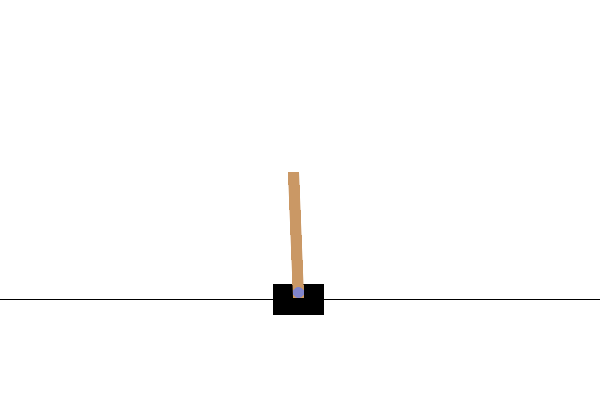

In [6]:
env.reset()
PIL.Image.fromarray(env.render())

In [7]:
display = Display(visible=0, size=(1400, 900))


In [8]:
episodes=10

for episode in range(1,episodes+1):
    state=env.reset()
    done=False
    score=0
    
    
    while not done:
        env.render()
        action=random.choice([0,1])
        n_state,reward,done,_,info=env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode,score))


Episode:1 Score:23.0
Episode:2 Score:20.0
Episode:3 Score:21.0
Episode:4 Score:27.0
Episode:5 Score:19.0
Episode:6 Score:13.0
Episode:7 Score:18.0
Episode:8 Score:17.0
Episode:9 Score:27.0
Episode:10 Score:63.0


In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [21]:
def build_model(states , actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24,activation='relu'))
    model.add(Dense(24,activation='relu'))
    model.add(Dense(actions,activation='linear'))
    return model

In [11]:
!pip install keras-rl2
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [22]:
model=build_model(states,actions)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 24)                120       
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


### USING KERAS RL 

In [13]:
def build_agent(model,actions):
    policy = BoltzmannQPolicy()
    memory=SequentialMemory(limit=50000 , window_length=1)
    dqn = DQNAgent(model=model , memory=memory ,policy=policy , nb_actions=actions , nb_steps_warmup =10 , target_model_update = 1e-2)
    return dqn

In [19]:
from tensorflow.keras.optimizers.legacy import Adam

In [24]:
!pip install rl-agents==0.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.5 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654622 sha256=3b62000acb2ffcf2dd63b4c6d296b7b64db87627445b47ffd277cfe4dfa26004
  Stored in directory: /root/.cache/pip/wheels/af/4b/74/fcfc8238472c34d7f96508a63c962ff3ac9485a9a4137afd4e
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: gym
    Found existing installation: gym 0.26.2
    Uninstalling gym-0.26.2:
      Successfully uninstalled gym-0.26.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requir

In [25]:
dqn=build_agent(model,actions)
dqn.compile(Adam(lr=1e-3),metrics=['mae'])
dqn.fit(env,nb_steps=50000,visualize=False , verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)


ValueError: Error when checking input: expected flatten_1_input to have shape (1, 4) but got array with shape (1, 2)